### In this notebook, the code is available for Day 2 of GDL.

In [18]:
# download the cifar10 dataset

import numpy as np
from tensorflow.keras import datasets, utils

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [19]:
# checking the shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [20]:
# scale the inputs
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# one hot encode the labels
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [21]:
# building the sequential model
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(200, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [22]:
# building our model using functional API
input_layer = layers.Input(shape=(32, 32, 3))
x = layers.Flatten()(input_layer)
x = layers.Dense(200, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
output_layer = layers.Dense(num_classes, activation='softmax')(x)

model_2 = models.Model(inputs=input_layer, outputs=output_layer)

# both methods give identical models (sequential or functional API), a diagram of the architecture is shown below:

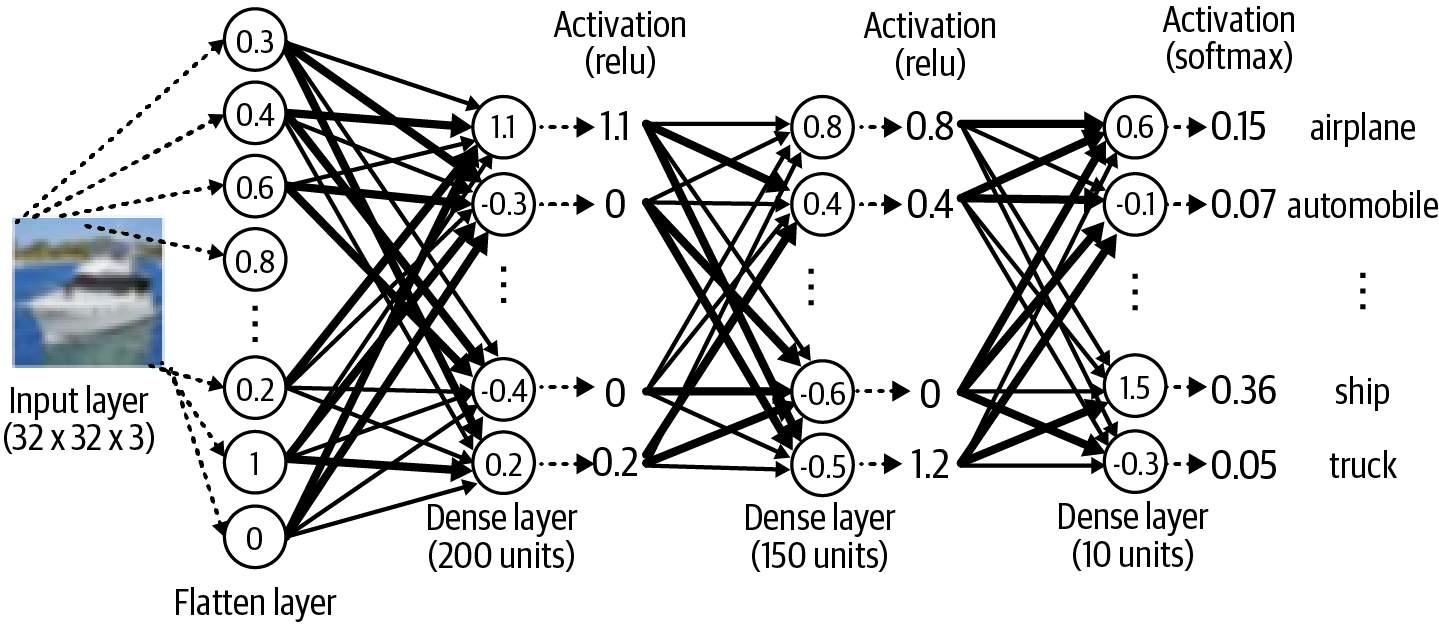

In [23]:
# inspecting the model
model.summary(), model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 200)               614600    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 635710 (2.43 MB)
Trainable params: 635710 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 

(None, None)

In [24]:
# compiling the model
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', ])

In [25]:
# train the model
model.fit(x_train, y_train, batch_size=32, epochs=10,)

Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8637 - accuracy: 0.3279
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6991 - accuracy: 0.3912
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6283 - accuracy: 0.4183
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5787 - accuracy: 0.4356
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5339 - accuracy: 0.4526
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5064 - accuracy: 0.4596
Epoch 7/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4838 - accuracy: 0.4704
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4586 - accuracy: 0.4776
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4450 - accuracy: 0.4835
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [26]:
# evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4529 - accuracy: 0.4813


[1.4528650045394897, 0.4812999963760376]

In [27]:
# viewing predictions on test set

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 1s 3ms/step


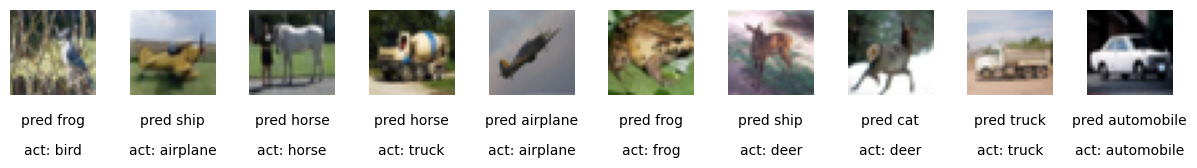

In [30]:
# displaying predict of neural network against actual labels

import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act: ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)